In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
import numpy as np
import os

In [3]:
from vae.arch_surprise_lower_tolerance import VAE
vae = VAE()
vae.set_weights('./vae/weight/best/arch_surprise_medium_tolerance.h5')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [5]:
DIR_NAME = './data/vae_food_3/'

observations = []

files = os.listdir(DIR_NAME)
for i in range(5):
    file = files[i]
    print(f'loaded file: {file}')
    
    obs = np.load(DIR_NAME + file)['obs']
    print(f'shape: {obs.shape}')
    
    observations.append(obs)
    
observations = np.concatenate(observations)
print(f'final shape: {observations.shape}')

loaded file: 1000393812.npz
shape: (818, 64, 64, 3)
loaded file: 1000484239.npz
shape: (996, 64, 64, 3)
loaded file: 100057874.npz
shape: (980, 64, 64, 3)
loaded file: 1000585003.npz
shape: (1027, 64, 64, 3)
loaded file: 1000626761.npz
shape: (801, 64, 64, 3)
final shape: (4622, 64, 64, 3)


In [6]:
mu_list = vae.encoder_mu_log_var.predict(observations)[0]
mu_list.shape

(4622, 64)

In [7]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
from sklearn.decomposition import PCA

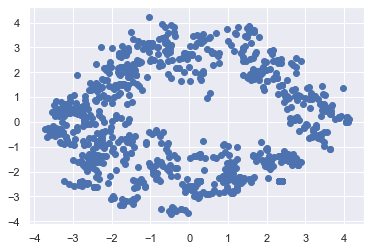

In [8]:
pca = PCA(n_components = 2)
components = pca.fit_transform(mu_list)

n = len(components)
indices = np.random.choice(np.arange(n), n//5, replace=False) # reduce clutter for better view of the spread
selection = components[indices, :]
plt.scatter(selection[:, 0], selection[:, 1]);

In [9]:
# low explained variance ratio could imply that these points form 
# a sphere-like shape in 64-dimensions
print(pca.explained_variance_ratio_)

[0.09958097 0.08677352]
